In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import math

from matplotlib.ticker import MaxNLocator

generate_plots = True

In [2]:
dataset = "Multi_Atlas"
dataset = "fMRIQA_v3"
df_temp = pd.read_csv("ACCRE/%s_bins_10perc.csv" %(dataset)) 

data = pd.Series(np.loadtxt("ACCRE/"+dataset+".out", delimiter=' '))
print(dataset, len(data))

fMRIQA_v3 4346


In [3]:
df_temp[df_temp.Bins==800]

,Unnamed: 0,Function,Parameters,Cost,Bins


In [4]:
def get_min_data(df_temp):
    df = pd.DataFrame(columns = ["Function", "Cost", "Bins"])
    continuous = []
    i=0
    for entry in df_temp.values.tolist():
        if math.isnan(entry[0]):
            continue
        if entry[1] == "Discreet":
            if len(continuous) > 0:
                df.loc[len(df)] = ["Continuous", min(continuous), current_set]
                continuous = []
            current_set = int(entry[4])
            df.loc[len(df)] = ["Discreet", float(entry[3]), current_set]
            continue

        if entry[1] == "Optimal":
            df.loc[len(df)] = ["Optimal", float(entry[3]), current_set]
            continue

        continuous.append(float(entry[3]))

    if len(continuous) > 0:
        df.loc[len(df)] = ["Continuous", min(continuous), current_set]
    return df
    
df = get_min_data(df_temp)
df.head(6)

,Function,Cost,Bins
0,Discreet,532.105679,50
1,Optimal,509.278145,50
2,Continuous,546.106493,50
3,Discreet,531.289199,100
4,Optimal,509.257444,100
5,Continuous,536.800649,100


In [5]:
df_optimal = df[df.Function=="Optimal"]
df_discreet = df[df.Function=="Discreet"]
#df_distr = df[(df.Function!="Optimal") & (df.Function!="Discreet") &
#              (df.Function!="Exponential") & (df.Function!="Polynomial")]
#df_temp = df[(df.Function=="Polynomial") | (df.Function=="Exponential")]
#df_funct = df_temp.loc[df_temp.groupby("Bins")["Cost"].idxmin()]
df_funct = df[df.Function=="Continuous"]

Text(0, 0.5, 'Cost')

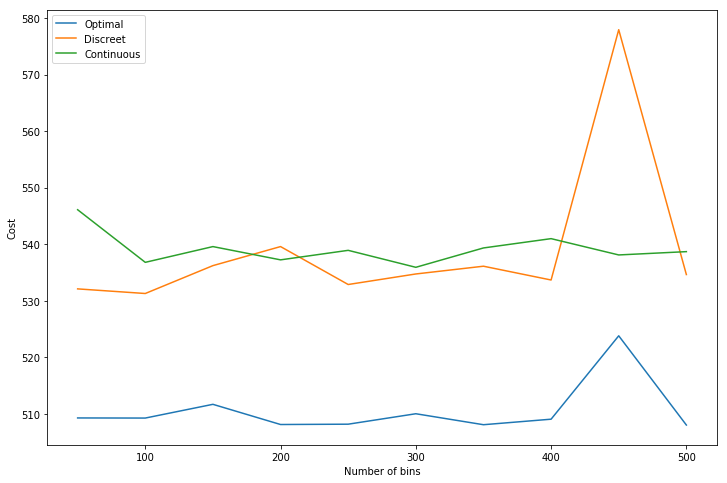

In [6]:
# plot the cost for different polynomial orders
plt.figure(figsize=(12,8))
ax = sns.lineplot(x="Bins", y="Cost", data=df_optimal, label="Optimal")
ax = sns.lineplot(x="Bins", y="Cost", data=df_discreet, label="Discreet")
#ax = sns.lineplot(x="Bins", y="Cost", data=df_funct, label="Function fit")
ax = sns.lineplot(x="Bins", y="Cost", data=df_funct, label="Continuous")
#ax = sns.lineplot(x="Bins", y="Cost", data=df_distr, label="Distribution fit")
ax.set_xlabel('Number of bins')
ax.set_ylabel('Cost')

In [ ]:
for bin_step in [100,200,600]:
    plt.figure(figsize=(12,8))
    ax = data.plot(kind='hist', bins=bin_step, density=True, alpha=0.5)
    #plt.plot(x, func(x, *popt), 'g--')
    ax.set_xlim(min(data), max(data))
    ax.set_xlabel('Walltime')
    ax.set_ylabel('Frequency')

    plt.figure(figsize=(12,8))
    ax = data[:int(len(data)/10)].plot(kind='hist', bins=bin_step, density=True, alpha=0.5)
    #plt.plot(x, func(x, *popt), 'g--')
    ax.set_xlim(min(data), max(data))
    ax.set_xlabel('Walltime')
    ax.set_ylabel('Frequency')

fMRIQA_v3
dtiQA_v2
dtiQA_v3
fMRIQA
fMRIQA_v2
Generic_FMRI_v1
Multi_Atlas
ON_CT_segmentation_v3
VBMQA


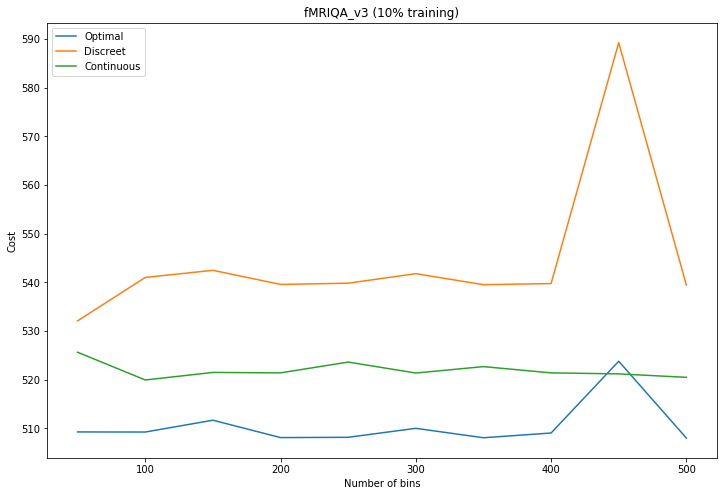

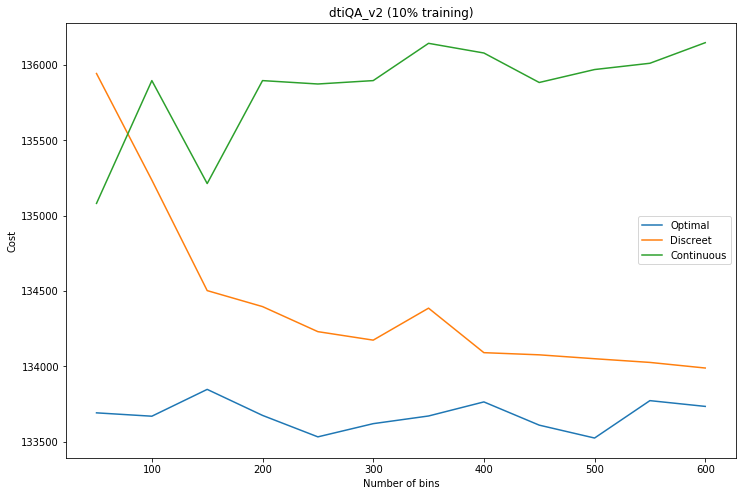

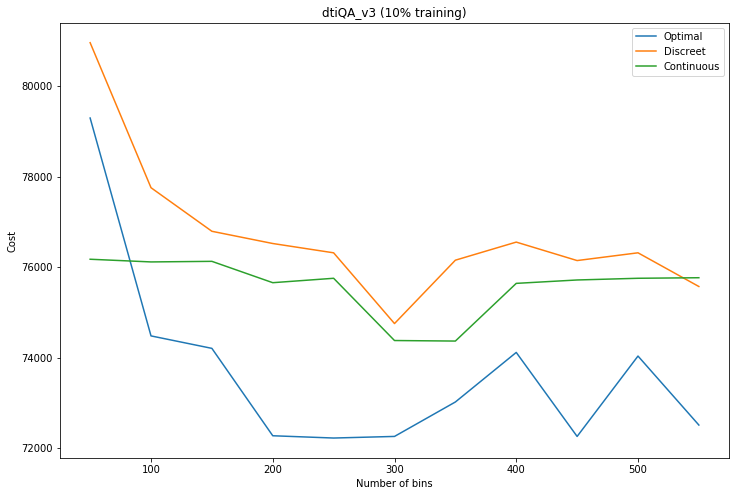

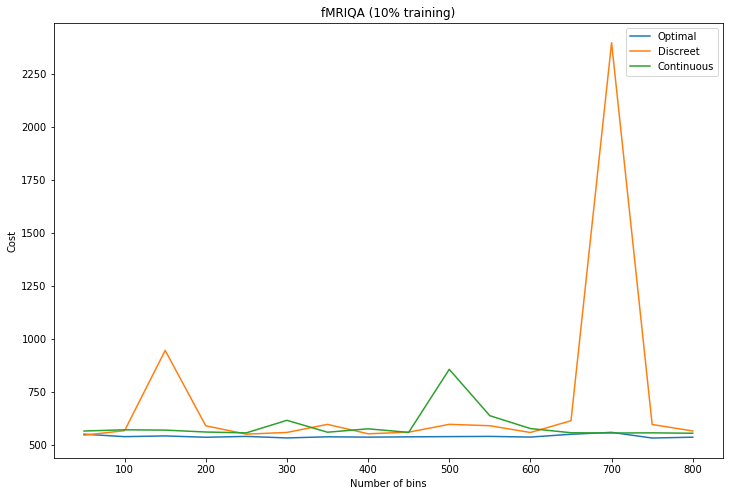

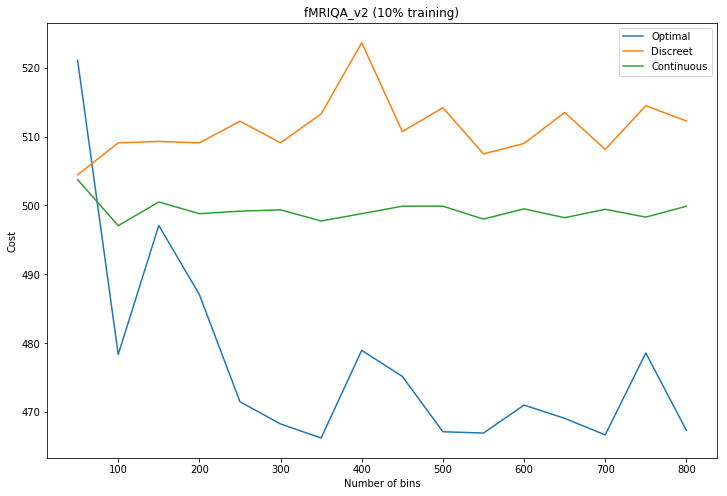

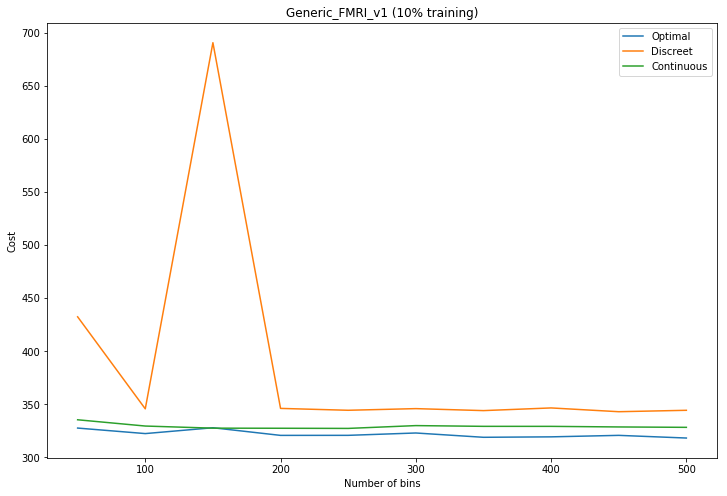

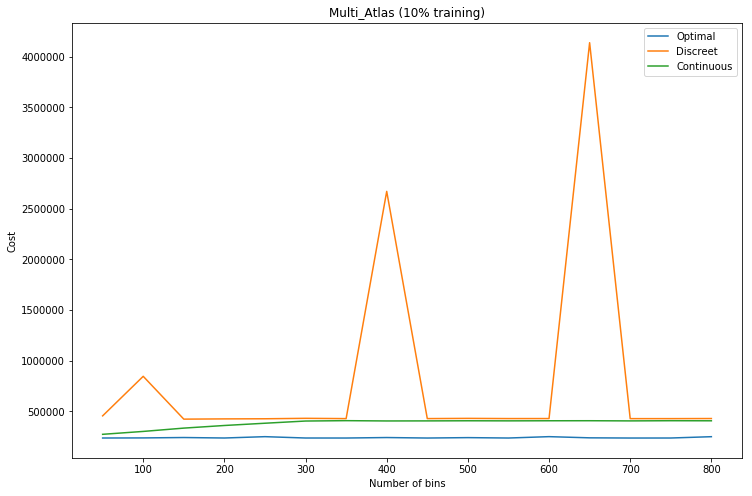

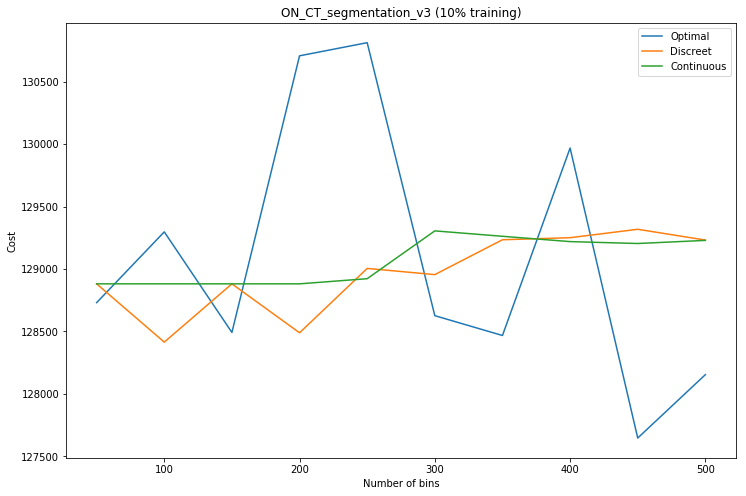

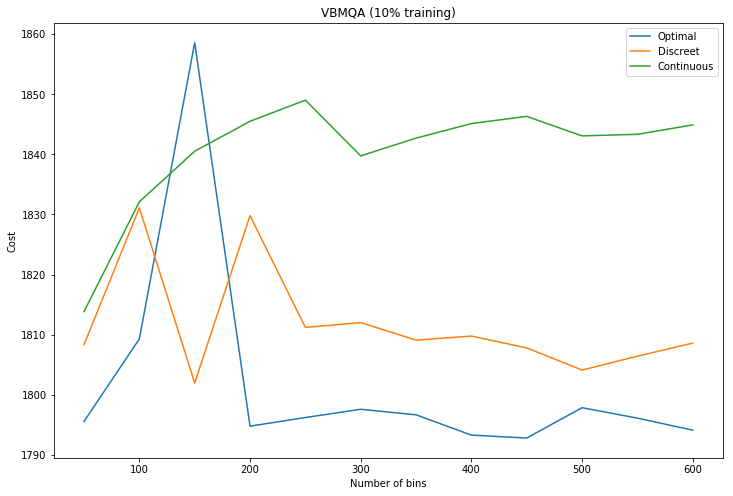

In [38]:
if generate_plots:
    i=0
    for path in glob.glob("ACCRE/*.csv"):
        dataset = path.split("/")[1]
        dataset = dataset[:-4]
        try:
            df = pd.read_csv("ACCRE/"+dataset+"_bins_10perc.csv") 
        except:
            continue

        df_optimal = df[df.Function=="Optimal"]
        df_discreet = df[df.Function=="Discreet"]
        #df_distr = df[(df.Function!="Optimal") & (df.Function!="Discreet") &
        #              (df.Function!="Exponential") & (df.Function!="Polynomial")]
        df_funct = df[(df.Function!="Optimal") & (df.Function!="Discreet")]
        df_funct = df_funct.loc[df_funct.groupby("Bins")["Cost"].idxmin()]
        
        print(dataset)
        plt.figure(figsize=(12,8))
        ax = sns.lineplot(x="Bins", y="Cost", data=df_optimal, label="Optimal")
        ax = sns.lineplot(x="Bins", y="Cost", data=df_discreet, label="Discreet")
        ax = sns.lineplot(x="Bins", y="Cost", data=df_funct, label="Continuous")
        #ax = sns.lineplot(x="Bins", y="Cost", data=df_distr, label="Distribution fit")
        ax.set_xlabel('Number of bins')
        ax.set_ylabel('Cost')
        ax.set_title(dataset + ' (10% training)')
        plt.savefig("figures_ACCRE/bins/%s_bins.png" %(dataset))
        
        i+=1
        #if i==3:
        #    break